# Exercise 1

For the first exercise we will first give the Model, than the classifier and then the main program:

In [7]:
%matplotlib inline
from chainer import Chain
import chainer.functions as F
import chainer.links as L
import chainer
import utils
from chainer import optimizers
import Networks
import chainer
from Classifier import Classifier
import matplotlib.pyplot as plt
import pickle

In [8]:
class FullyConnectedNet(Chain):
    """
        Neural Network Definition
    """

    layers = []
    n_hidden = 10

    def __init__(self, N, n_classes):
        super(FullyConnectedNet, self).__init__()
        with self.init_scope():
            self.N = N
            if N == 1:
                self.l1 = L.Linear(None, n_classes)
            elif N == 2:
                self.l1 = L.Linear(None, self.n_hidden)  # input layer -> hidden layer
                self.l2 = L.Linear(None, n_classes)  # hidden layer -> output layer
            elif N == 3:
                self.l1 = L.Linear(None, self.n_hidden)  # input layer -> hidden layer1
                self.l2 = L.Linear(None, self.n_hidden)  # hidden layer1 -> hidden layer 2
                self.l3 = L.Linear(None, n_classes)  # hidden layer2 -> output layer

    def __call__(self, x):
        """
        Feed the data in a forward fashion through the MLP
        :param x: Data
        :return: Last Link of the MLP
        """
        layer_output = None
        if self.N == 1:
            layer_output = self.l1(x)

        if self.N == 2:
            layer_hidden = F.relu(self.l1(x))
            layer_output = self.l2(layer_hidden)

        if self.N == 3:
            layer_hidden = F.relu(self.l1(x))
            layer_hidden2 = F.relu(self.l2(layer_hidden))
            layer_output = self.l2(layer_hidden2)

        return layer_output


In [9]:
class Classifier(Chain):
    def __init__(self, predictor):
        super(Classifier, self).__init__()
        with self.init_scope():
            self.predictor = predictor

    def __call__(self, data, labels):
        y = self.predictor(data)
        self.loss = F.softmax_cross_entropy(y, labels)
        self.accuracy = F.accuracy(y, labels)
        report({'loss': self.loss, 'accuracy': self.accuracy}, self)
        return self.loss


Epoch 1 
Training: accuracy: 0.8261833333333334 	 loss: 0.7682692009131113 
Testing: accuracy: 0.8798076923076923 	 loss: 0.4784096471296671
Epoch 2 
Training: accuracy: 0.8814333333333333 	 loss: 0.4535105136791865 
Testing: accuracy: 0.8961338141025641 	 loss: 0.39857732714750826
Epoch 3 
Training: accuracy: 0.89205 	 loss: 0.4013995580037435 
Testing: accuracy: 0.9013421474358975 	 loss: 0.3661349613744861
Epoch 4 
Training: accuracy: 0.8976833333333334 	 loss: 0.3753290759603182 
Testing: accuracy: 0.9061498397435898 	 loss: 0.3477941598170079
Epoch 5 
Training: accuracy: 0.9013666666666666 	 loss: 0.3588067326903343 
Testing: accuracy: 0.9089543269230769 	 loss: 0.33532877631772023
Epoch 6 
Training: accuracy: 0.9031166666666667 	 loss: 0.347123977847894 
Testing: accuracy: 0.9103565705128205 	 loss: 0.32639123083880317
Epoch 7 
Training: accuracy: 0.90615 	 loss: 0.3381087487459183 
Testing: accuracy: 0.9125600961538461 	 loss: 0.3201209904434971
Epoch 8 
Training: accuracy: 0.90

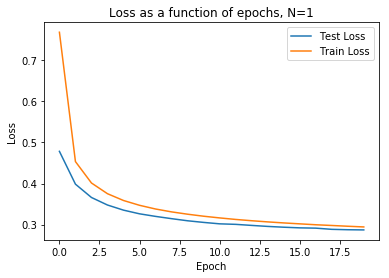

Epoch 1 
Training: accuracy: 0.7585666666666666 	 loss: 0.8786602860450745 
Testing: accuracy: 0.8756009615384616 	 loss: 0.4575536337036353
Epoch 2 
Training: accuracy: 0.8838666666666667 	 loss: 0.4176076626618703 
Testing: accuracy: 0.899238782051282 	 loss: 0.35668448640558964
Epoch 3 
Training: accuracy: 0.8986 	 loss: 0.36021424076159797 
Testing: accuracy: 0.9084535256410257 	 loss: 0.32699041990324473
Epoch 4 
Training: accuracy: 0.9050166666666667 	 loss: 0.3361792378346125 
Testing: accuracy: 0.9088541666666666 	 loss: 0.3166528545940916
Epoch 5 
Training: accuracy: 0.9094 	 loss: 0.3214045833985011 
Testing: accuracy: 0.9127604166666666 	 loss: 0.30007729163536656
Epoch 6 
Training: accuracy: 0.9117666666666666 	 loss: 0.3109000097592672 
Testing: accuracy: 0.9159655448717948 	 loss: 0.29231030534570795
Epoch 7 
Training: accuracy: 0.9148333333333334 	 loss: 0.30260809931755067 
Testing: accuracy: 0.9185697115384616 	 loss: 0.28607399202883244
Epoch 8 
Training: accuracy: 0.

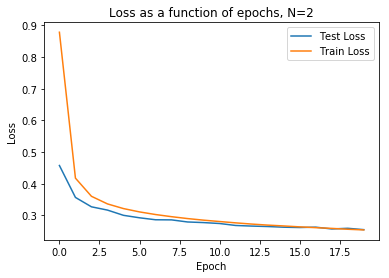

Epoch 1 
Training: accuracy: 0.6591166666666667 	 loss: 1.0648699362198513 
Testing: accuracy: 0.8444511217948718 	 loss: 0.5329901663443217
Epoch 2 
Training: accuracy: 0.8688 	 loss: 0.45409782526890435 
Testing: accuracy: 0.8877203525641025 	 loss: 0.38546106169143546
Epoch 3 
Training: accuracy: 0.8958833333333334 	 loss: 0.3671278952558835 
Testing: accuracy: 0.903145032051282 	 loss: 0.33615465918317056
Epoch 4 
Training: accuracy: 0.9052 	 loss: 0.33368123927116394 
Testing: accuracy: 0.9096554487179487 	 loss: 0.3111011398096497
Epoch 5 
Training: accuracy: 0.9114833333333333 	 loss: 0.3112885787526766 
Testing: accuracy: 0.9143629807692307 	 loss: 0.2935396184046299
Epoch 6 
Training: accuracy: 0.9164 	 loss: 0.29484629290103914 
Testing: accuracy: 0.9168669871794872 	 loss: 0.2985260244458914
Epoch 7 
Training: accuracy: 0.9206333333333333 	 loss: 0.2813658418536186 
Testing: accuracy: 0.9186698717948718 	 loss: 0.2827837715068689
Epoch 8 
Training: accuracy: 0.9232 	 loss: 0

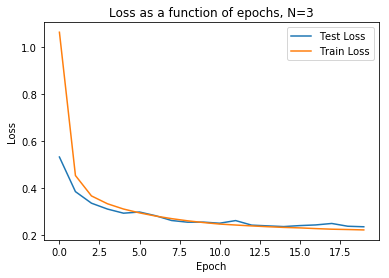

In [10]:
import utils
from chainer import optimizers
import Networks
import chainer
from Classifier import Classifier
import matplotlib.pyplot as plt
import pickle

# Import whole dataset
train, test = chainer.datasets.get_mnist()

n_output = 10
n_epochs = 20
batch_size = 32

train_iter = utils.RandomIterator(train, batch_size)
test_iter = utils.RandomIterator(test, batch_size)


def feed_data(model, optimizer, random_iter, update):
    """
    Feeds the network data
    :param random_iter: Iterator that holds the data
    :param update: Boolean whether to update the model parameters
    :return: loss and accuracy
    """
    total_loss = 0
    total_accuracy = 0

    for data in random_iter:
        x = data[0]
        labels = data[1]
        if update:
            optimizer.update(model, x, labels)
        else:
            model(x, labels)
        total_loss += float(model.loss.data)
        total_accuracy += float(model.accuracy.data)
    return total_loss / random_iter.idx, total_accuracy / random_iter.idx


def trainNetwork(model, optimizer):
    """
    Trains the MLP network for n_epochs.
    One epoch contains of a training phase and testing phase. Afterwards, the results are printed to the screen
    """
    train_loss_list = []
    test_loss_list = []
    for epoch in range(n_epochs):
        train_loss, train_accuracy = feed_data(model, optimizer, train_iter, True)
        test_loss, test_accuracy = feed_data(model, optimizer, test_iter, False)

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        print('Epoch {} \n'
              'Training: accuracy: {} \t loss: {} \n'
              'Testing: accuracy: {} \t loss: {}'.format(epoch + 1,
                                                         train_accuracy, train_loss,
                                                         test_accuracy, test_loss))

    return train_loss_list, test_loss_list


def run():
    for N in range(1, 4):
        model = Classifier(Networks.FullyConnectedNet(N, 10))
        optimizer = optimizers.SGD()
        optimizer.setup(model)

        train_loss_list, test_loss_list = trainNetwork(model, optimizer)
        plt.plot(test_loss_list, label='Test Loss')
        plt.plot(train_loss_list, label='Train Loss')
        plt.legend()
        plt.ylabel("Loss")
        plt.xlabel("Epoch")
        plt.title("Loss as a function of epochs, N=%s" %N)
        plt.show()


run()

## Conclusion
For N = 1, you don't have a hidden layer, such that the input -> output. We would expect the accuracy to be fairly poor, however it performed pretty well (acc ~0.918). It is important to note that the accuracy on the training data is lower than the accuracy on the testing data. Indicating that it generalised better. However, since the model is randomly initialized, this is due to chance.

For N = 2, you have one hidden layer. Our expectations were that it performed better than the N = 1 case, which it did: acc ~0.928 vs. ~0.918. The training acc is higher than the testing acc.

For N = 3, you have two hidden layers. Our expectations were that this did not/marginally did perform better than the N = 2 case. This was again confirmed: acc ~0.929 vs. acc ~0.928. Which is basically the same, when you run it again it could converge to the same results of N = 2.

# Exercise 2

In [11]:
class Convolutional(Chain):
    """
        Neural Network Definition, Of a Convo
        l1: fully connected hidden layer
        l2: output layer
    """
    def __init__(self):
        super(Convolutional, self).__init__()
        with self.init_scope():
            feature_maps = 5
            self.convLayer = L.Convolution2D(None, feature_maps, ksize=5)
            self.fullyConnectedOutput = L.Linear(None, 10)

    def __call__(self, x):
        """
        Feed the data in a forward fashion through the MLP
        :param x: Data
        :return: Last Link of the MLP
        """

        conv_units = F.dropout(F.relu(self.convLayer(x)),ratio=0.4)
        max_pooling_units = F.max_pooling_2d(conv_units, ksize=2)
        connected = F.dropout(self.fullyConnectedOutput(max_pooling_units), ratio=.2)
        return connected

Training Data: accuracy: 0.9826833333333334 	 loss: 0.060649493312835694 
Testing Data: accuracy: 0.9799679487179487 	 loss: 0.0632284892579684


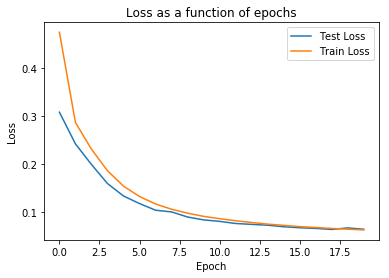

In [14]:
import utils
from chainer import optimizers
import Networks
import chainer
from chainer.links import Classifier
import matplotlib.pyplot as plt
import pickle

# Import whole dataset
train, test = chainer.datasets.get_mnist(ndim=3)  # Convolution requires 3 dimensions.

n_hidden = 10
n_output = 10
n_epochs = 20
batch_size = 32

train_iter = utils.RandomIterator(train, batch_size)
test_iter = utils.RandomIterator(test, batch_size)


def get_model(model_name):
    """
    Get the model if it exists, train one if it does not.
    """
    try:
        pickle_in = open("{}_model.pickle".format(model_name), 'rb')
        model = pickle.load(pickle_in)

        pickle_in = open("{}_optimizer.pickle".format(model_name), 'rb')
        optimizer = pickle.load(pickle_in)

        pickle_in = open("{}_results.pickle".format(model_name), 'rb')
        results = pickle.load(pickle_in)
    except FileNotFoundError:
        # Standard classifier that uses softmax_cross_entropy as loss function
        model = Classifier(Networks.Convolutional())
        optimizer = optimizers.SGD()
        optimizer.setup(model)
        print("Model not found! Starting training ...")
        results = train_network(model, optimizer)
        with open('{}_model.pickle'.format(model_name), 'wb') as f:
            pickle.dump(model, f)
        with open('{}_optimizer.pickle'.format(model_name), 'wb') as f:
            pickle.dump(optimizer, f)
        with open('{}_results.pickle'.format(model_name), 'wb') as f:
            pickle.dump(results, f)

    return model, optimizer, results


def feed_data(model, optimizer, random_iter, update):
    """
    Feeds the network data
    :param random_iter: Iterator that holds the data
    :param update: Boolean whether to update the model parameters
    :return: loss and accuracy
    """
    with chainer.using_config('train', update):
        total_loss = 0
        total_accuracy = 0

        for data in random_iter:
            x = data[0]
            labels = data[1]
            if update:
                optimizer.update(model, x, labels)
            else:
                model(x, labels)
            total_loss += float(model.loss.data)
            total_accuracy += float(model.accuracy.data)
        return total_loss / random_iter.idx, total_accuracy / random_iter.idx


def train_network(model, optimizer):
    """
    Trains the network for n_epochs.
    One epoch contains of a training phase and testing phase. Afterwards, the results are printed to the screen
    """

    train_loss_list = []
    test_loss_list = []

    for epoch in range(n_epochs):
        train_loss, train_accuracy = feed_data(model, optimizer, train_iter, True)
        test_loss, test_accuracy = feed_data(model, optimizer, test_iter, False)

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        print('Epoch {} \n'
              'Training: accuracy: {} \t loss: {} \n'
              'Testing: accuracy: {} \t loss: {}'.format(epoch + 1,
                                                         train_accuracy, train_loss,
                                                         test_accuracy, test_loss))
    return [train_loss_list, test_loss_list]


def test_network(model, optimizer):
    """
    Tests the conv network
    """

    train_loss, train_accuracy = feed_data(model, optimizer, train_iter, False)
    test_loss, test_accuracy = feed_data(model, optimizer, test_iter, False)

    print('Training Data: accuracy: {} \t loss: {} \n'
          'Testing Data: accuracy: {} \t loss: {}'.format(train_accuracy, train_loss,
                                                          test_accuracy, test_loss))


def run(network_name):
	model, optimizer, results = get_model(network_name)
	test_network(model, optimizer)

	plt.plot(results[1], label='Test Loss')
	plt.plot(results[0], label='Train Loss')
	plt.legend()
	plt.ylabel("Loss")
	plt.xlabel("Epoch")
	plt.title("Loss as a function of epochs")
	plt.show()

	
# MAIN PROGRAM START
run("convnet_v0")

## Conclusions
The convnet's loss decreases faster than the MLP net's loss, it also converges to a lower loss. It converges roughly at the same time. Which makes sense since the convnet should outperform the MLP with graphical data (pixels) and because it has more hidden units per layer.

# Exercise 3
Convolution is biologically plausible, because it kind of mimics certain systems in the brain. For example: our visual system consists of multiple layers. Where the first layers detects "basic" features, they are basically line detectors. These simple features are then used in subsequent layers where they compose more complex features.

Convolution is biologically implausible since the computations and transformations that are done by a convolutional/pooling layer are too complex to be mimicked by actual neurons in the brain that just have binary output, they fire or they don't.

# Exercise 4 - Dropout

Training Data: accuracy: 0.9802333333333333 	 loss: 0.08191466067135333 
Testing Data: accuracy: 0.9803685897435898 	 loss: 0.07983087805004264


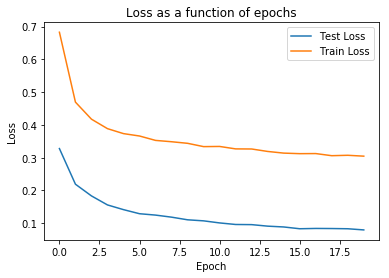

In [13]:
run("convnet_dropout")

## Conclusion
When using dropout, we see that there is a big difference between the test and training losses. This is because Dropout drops out units at a specific rate per layer. We implemented dropout where the dropout for the input is 0.4 and for the output is 0.2. Since Dropout only occurs when training, the training loss is much higher than the testing loss.

When comparing it to the convnet without dropout, the loss of the convnet is lower than that of the convnet with dropout for the same reasons as noted above. The accuracy of the convnet with dropout is higher on the testing data than that of the convnet. This is because when using dropout you "distort" your training data, which enables the neural net to be able to generalize, resulting in a higher accuracy.